In [70]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import pandas as pd

In [325]:
def logs_to_pandas(path: str) -> pd.DataFrame:
    """convert single tensorflow log file to pandas DataFrame
    Parameters
    ----------
    path : str
        path to tensorflow log file
    Returns
    -------
    pd.DataFrame
        converted dataframe
    """

    runlog_data = pd.DataFrame({"metric": [], "value": [], "step": [], "wall_time": []})
    try:
        event_acc = summary_iterator(path)
        for event in list(event_acc)[1:]:
            step, wall_time = event.step, pd.to_datetime(event.wall_time, unit='s')
            simple_extractor = [{"metric": v.tag, "value": v.simple_value, "step": step, 'wall_time': wall_time} for v in event.summary.value]
            event_r = pd.DataFrame(simple_extractor)
            runlog_data = pd.concat([runlog_data, event_r])
    # Dirty catch of DataLossError
    except Exception as e:
        print("Event file possibly corrupt: {}".format(path))
        print(e)
    return runlog_data

In [326]:
import glob
import os

search_dir = "./logging/0/"

files = list(filter(os.path.isfile, glob.glob(search_dir + "*")))
files.sort(key=lambda x: os.path.getmtime(x))

files

[]

In [387]:
import os
from glob import glob


search_dir = "/Users/Chris/Downloads/0/"
lorenzo_files = [y for x in os.walk(search_dir) for y in glob(os.path.join(x[0], '*.0'))]
lorenzo_files

['/Users/Chris/Downloads/0/cloud_experiment_5cc1f4f0-6e5c-482e-9e2f-47365c9d35c6/0/Nets.fashion_mnist_cnn_Dataset.fashion_mnist/events.out.tfevents.1666720922.trainjob-5cc1f4f0-6e5c-482e-9e2f-47365c9d35c6-master-0.1.0',
 '/Users/Chris/Downloads/0/cloud_experiment_39fc0a27-d193-4c67-b7f4-5fef76dbd291/0/Nets.cifar10_cnn_Dataset.cifar10/events.out.tfevents.1666698146.trainjob-39fc0a27-d193-4c67-b7f4-5fef76dbd291-master-0.1.0',
 '/Users/Chris/Downloads/0/cloud_experiment_98c436e7-3214-4496-9192-563ff9f8408b/0/Nets.fashion_mnist_cnn_Dataset.fashion_mnist/events.out.tfevents.1666704356.trainjob-98c436e7-3214-4496-9192-563ff9f8408b-master-0.1.0',
 '/Users/Chris/Downloads/0/cloud_experiment_cd0ce6a8-5fa2-490d-a224-e089e99aa1cb/0/Nets.fashion_mnist_cnn_Dataset.fashion_mnist/events.out.tfevents.1666674293.trainjob-cd0ce6a8-5fa2-490d-a224-e089e99aa1cb-master-0.1.0',
 '/Users/Chris/Downloads/0/cloud_experiment_1ffed894-295f-4069-a584-c28ba64608fc/0/Nets.cifar10_cnn_Dataset.cifar10/events.out.tfeve

In [372]:
search_dir = "/Users/Chris/Documents/tudelft/fltk-testbed/jupyter/experiment_logging/0/"
chris_files = [y for x in os.walk(search_dir) for y in glob(os.path.join(x[0], '*.0'))]
len(chris_files)

85

In [373]:
lorenzo_log_list = []
lorenzo_files = sorted(lorenzo_files, key=lambda x: int(x.split(".")[-4]) )

for r in lorenzo_files:
    if "real_run_cnn" in r:
        continue
    else:
        logs = logs_to_pandas(r)
        lorenzo_log_list.append((r, logs))

# lorenzo_sorted_loglist = sorted(lorenzo_log_list, key=lambda x: x[1]["wall_time"].iloc[0])
# lorenzo_sorted_loglist.reverse()

lorenzo_sorted_loglist = lorenzo_log_list
len(lorenzo_sorted_loglist)

24

In [380]:
# lorenzo_files = sorted(lorenzo_files, key=lambda x: int(x.split(".")[-4]) )

lorenzo_files.sort(reverse=True)


In [381]:
df = lorenzo_sorted_loglist[0][1]

df[df.metric == "accuracy per epoch"].iloc[-1]

metric                  accuracy per epoch
value                            66.599998
step                                  39.0
wall_time    2022-10-24 23:50:55.699287552
Name: 0, dtype: object

In [442]:
chris_log_list = []

for r in chris_files:
    if not "real_run_cnn" in r:
        continue
    else:
        logs = logs_to_pandas(r)
        chris_log_list.append((r, logs))

print(len(chris_log_list))

chris_sorted_loglist = sorted(chris_log_list, key=lambda x: x[1]["wall_time"].iloc[0])
chris_sorted_loglist.reverse()
len(chris_sorted_loglist)

24


24

In [443]:
import json
experiment_config_lorenzo = json.load(open("/Users/Chris/Downloads/lorenzo_tasks.json"))
experiment_config_chris = json.load(open("../chris_tasks2.json"))

lorenzo_tasks = experiment_config_lorenzo["trainTasks"]
chris_tasks = experiment_config_chris["trainTasks"]

# lorenzo_tasks.reverse()

In [445]:
lorenzo_files.reverse()
for i, val in enumerate(lorenzo_files):
    task = lorenzo_tasks[i]
    network = task['jobClassParameters'][0]['networkConfiguration']['network']
    
    print(network, val.split("/")[7])

Cifar10CNN Nets.cifar10_cnn_Dataset.cifar10
FashionMNISTCNN Nets.fashion_mnist_cnn_Dataset.fashion_mnist
Cifar10CNN Nets.cifar10_cnn_Dataset.cifar10
Cifar10CNN Nets.fashion_mnist_cnn_Dataset.fashion_mnist
FashionMNISTCNN Nets.cifar10_cnn_Dataset.cifar10
Cifar10CNN Nets.cifar10_cnn_Dataset.cifar10
FashionMNISTCNN Nets.fashion_mnist_cnn_Dataset.fashion_mnist
Cifar10CNN Nets.fashion_mnist_cnn_Dataset.fashion_mnist
Cifar10CNN Nets.cifar10_cnn_Dataset.cifar10
FashionMNISTCNN Nets.cifar10_cnn_Dataset.cifar10
Cifar10CNN Nets.fashion_mnist_cnn_Dataset.fashion_mnist
Cifar10CNN Nets.cifar10_cnn_Dataset.cifar10
FashionMNISTCNN Nets.cifar10_cnn_Dataset.cifar10
Cifar10CNN Nets.cifar10_cnn_Dataset.cifar10
FashionMNISTCNN Nets.cifar10_cnn_Dataset.cifar10
Cifar10CNN Nets.cifar10_cnn_Dataset.cifar10
Cifar10CNN Nets.cifar10_cnn_Dataset.cifar10
FashionMNISTCNN Nets.cifar10_cnn_Dataset.cifar10
Cifar10CNN Nets.fashion_mnist_cnn_Dataset.fashion_mnist
Cifar10CNN Nets.cifar10_cnn_Dataset.cifar10
FashionMNISTC

In [446]:

len(lorenzo_tasks), len(lorenzo_sorted_loglist), len(chris_tasks), len(chris_sorted_loglist)


(24, 24, 24, 24)

In [447]:
test = [[lorenzo_sorted_loglist[i], lorenzo_sorted_loglist[i+8], lorenzo_sorted_loglist[i+16]] for i in range(len(lorenzo_sorted_loglist)//3)]

flat_test = [item for sublist in test for item in sublist]

flat_test

[('/Users/Chris/Downloads/0/cloud_experiment_fca162e2-af0d-4412-a9dd-b7b63deb4f3e/0/Nets.cifar10_cnn_Dataset.cifar10/events.out.tfevents.1666652458.trainjob-fca162e2-af0d-4412-a9dd-b7b63deb4f3e-master-0.1.0',
                       metric      value  step                     wall_time
  0   training loss per epoch   2.287352   1.0 2022-10-24 23:02:14.481901568
  0        accuracy per epoch  23.920000   1.0 2022-10-24 23:02:14.482018048
  0   training loss per epoch   2.208657   2.0 2022-10-24 23:03:31.793368832
  0        accuracy per epoch  30.920000   2.0 2022-10-24 23:03:31.793495296
  0   training loss per epoch   2.160073   3.0 2022-10-24 23:04:47.515908608
  ..                      ...        ...   ...                           ...
  0   training loss per epoch   1.778691  38.0 2022-10-24 23:49:39.025341440
  0        accuracy per epoch  66.040001  38.0 2022-10-24 23:49:39.025438976
  0   training loss per epoch   1.769084  39.0 2022-10-24 23:50:55.699096832
  0        accuracy p

# Training the models

In [448]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [449]:
DATASETS = ["fashion_mnist", "cifar10"]
MODELS = ["fashion_mnist_cnn_Dataset", "cifar10_cnn_Dataset"]
OPTIMISERS = ["SGD", "Adam"]
LRS = [1e-3, 1e-4]

In [456]:
from datetime import timedelta

def logs_to_dataset(logs, tasks, data_pos=7):
    d = []

    for i, log in enumerate(logs):
        task = tasks[i]

        model = task['jobClassParameters'][0]['networkConfiguration']['network']
        model_path = log[0].split("/")[data_pos]
        print(log[0])
        
        dataset = model_path.split(".")[-1]
        model = model_path.split(".")[1]
        

        
        epochs = (len(log[1]) + 1) // 2
        
#         dataset = task['jobClassParameters'][0]['networkConfiguration']['dataset']

        epochs = task['jobClassParameters'][0]['hyperParameters']['default']['totalEpochs']
        learning_rate = task['jobClassParameters'][0]['hyperParameters']['default']['optimizerConfig']['learningRate']
        optimizer = task['jobClassParameters'][0]['hyperParameters']['default']['optimizerConfig']['type']
        
        print(model, epochs)
            
        model_id = MODELS.index(model)
        dataset_id = DATASETS.index(dataset)
        optimizer_id = OPTIMISERS.index(optimizer)
        lr_id = LRS.index(learning_rate)

        time_error_delta = timedelta(seconds=0.01) # probably not so quick epochs

        start_time = log[1]['wall_time'].iloc[0]
        for index, entry in log[1].iterrows():
            if entry['metric'] == "training loss per epoch":
                  continue

            runtime = (entry["wall_time"] - start_time)
            if runtime <= time_error_delta:
                continue
            epoch = int(entry["step"])
            accuracy = entry['value'] / 100
            data_row = [model_id, dataset_id, optimizer_id, lr_id, runtime.total_seconds(), epoch]
            d.append(data_row)
            
    return d

In [457]:
lorenzo_data = logs_to_dataset(lorenzo_sorted_loglist, lorenzo_tasks, data_pos=7)
chris_data =  logs_to_dataset(chris_sorted_loglist, chris_tasks, data_pos=11)

total_data = []
total_data.extend(lorenzo_data)
total_data.extend(chris_data)

len(total_data)

/Users/Chris/Downloads/0/cloud_experiment_fca162e2-af0d-4412-a9dd-b7b63deb4f3e/0/Nets.cifar10_cnn_Dataset.cifar10/events.out.tfevents.1666652458.trainjob-fca162e2-af0d-4412-a9dd-b7b63deb4f3e-master-0.1.0
cifar10_cnn_Dataset 40
/Users/Chris/Downloads/0/cloud_experiment_b9fedaa3-a363-4a88-8291-c06ec170d6b7/0/Nets.cifar10_cnn_Dataset.cifar10/events.out.tfevents.1666655553.trainjob-b9fedaa3-a363-4a88-8291-c06ec170d6b7-master-0.1.0
cifar10_cnn_Dataset 80
/Users/Chris/Downloads/0/cloud_experiment_b59c122b-1237-4242-b6f2-44cbc5e79393/0/Nets.fashion_mnist_cnn_Dataset.fashion_mnist/events.out.tfevents.1666658690.trainjob-b59c122b-1237-4242-b6f2-44cbc5e79393-master-0.1.0
fashion_mnist_cnn_Dataset 40
/Users/Chris/Downloads/0/cloud_experiment_f4c74923-e7e1-4e1d-b4e8-0206cadcf308/0/Nets.fashion_mnist_cnn_Dataset.fashion_mnist/events.out.tfevents.1666659766.trainjob-f4c74923-e7e1-4e1d-b4e8-0206cadcf308-master-0.1.0
fashion_mnist_cnn_Dataset 40
/Users/Chris/Downloads/0/cloud_experiment_bd15a585-93db-

/Users/Chris/Documents/tudelft/fltk-testbed/jupyter/experiment_logging/0/real_run_cnn_e416c2a0-fd47-48c1-bbdc-bebc72f1e3b6/0/Nets.fashion_mnist_cnn_Dataset.fashion_mnist/events.out.tfevents.1666670071.trainjob-e416c2a0-fd47-48c1-bbdc-bebc72f1e3b6-master-0.1.0
fashion_mnist_cnn_Dataset 80
/Users/Chris/Documents/tudelft/fltk-testbed/jupyter/experiment_logging/0/real_run_cnn_e19a31d1-e477-4378-beda-5e5b601cbc62/0/Nets.cifar10_cnn_Dataset.cifar10/events.out.tfevents.1666663893.trainjob-e19a31d1-e477-4378-beda-5e5b601cbc62-master-0.1.0
cifar10_cnn_Dataset 80
/Users/Chris/Documents/tudelft/fltk-testbed/jupyter/experiment_logging/0/real_run_cnn_f3ebf776-a8aa-4a07-954e-88792da57215/0/Nets.cifar10_cnn_Dataset.cifar10/events.out.tfevents.1666657720.trainjob-f3ebf776-a8aa-4a07-954e-88792da57215-master-0.1.0
cifar10_cnn_Dataset 40
/Users/Chris/Documents/tudelft/fltk-testbed/jupyter/experiment_logging/0/real_run_cnn_1c62aed5-c515-4e9d-9d69-35aefad004e8/0/Nets.cifar10_cnn_Dataset.cifar10/events.out.

2885

In [458]:
x_data = [np.array(i[:-1]) for i in total_data]
epochs = np.array([i[-1] for i in total_data])

In [459]:
def test_model(x_data, y_data, model_pipeline, test_size=0.15, seed=42):
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, 
        y_data, 
        test_size=test_size,
        random_state=seed
    )
    
    model_pipeline.fit(x_train, y_train)
    
    pred = clf.predict(x_test)

    pred = np.array([int(round(i)) for i in  pred])
    
    mae = mean_absolute_error(y_test, pred)

    print(f"Model scored {mae} mae")
    
    return mae, (y_test - pred)
    

## MLP Regressor

In [460]:
clf = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(80, 30,), activation="relu", max_iter=1000)) 

mlp_mae, mlp_error_matrix = test_model(x_data, epochs, clf)

Model scored 0.5866050808314087 mae


## Support Vector Regressor

In [477]:
clf = make_pipeline(StandardScaler(), SVR(kernel="rbf", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1))
svr_mae, svr_error_matrix = test_model(x_data, epochs, clf)

import pickle
pick = pickle.dumps(clf)
with open("model.m", "wb") as f:
    f.write(pick)
    f.close()

Model scored 0.5150115473441108 mae


## Random Forest Regressor

In [462]:
clf = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=4))
rf_mae, rf_error_matrix = test_model(x_data, epochs, clf)

import pickle
pick = pickle.dumps(clf)
with open("model.m", "wb") as f:
    f.write(pick)
    f.close()

Model scored 0.7598152424942263 mae


## KNN Regressor

In [463]:
clf = make_pipeline(StandardScaler(), KNeighborsRegressor(5))
knn_mae, knn_error_matrix = test_model(x_data, epochs, clf)

Model scored 0.6466512702078522 mae


# Error comparisons

In [464]:
import matplotlib.pyplot as plt

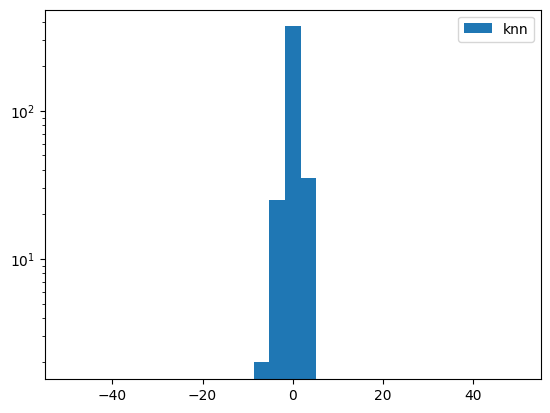

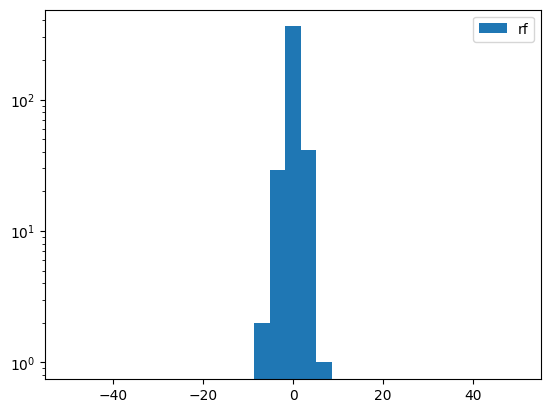

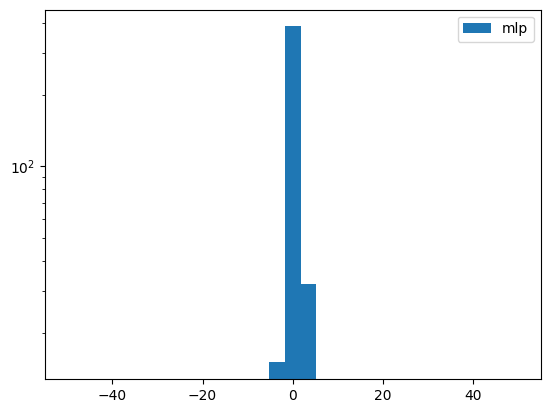

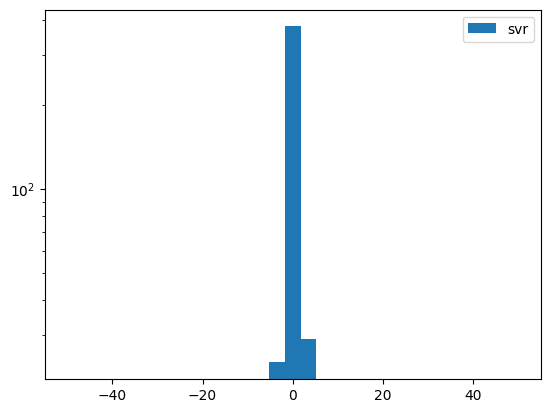

In [465]:
bins = np.linspace(-50, 50, 30)

# knn
plt.hist(knn_error_matrix, bins, alpha=1, label='knn', log=True)
plt.legend(loc='upper right')
plt.show()

# rf
plt.hist(rf_error_matrix, bins, alpha=1, label='rf', log=True)
plt.legend(loc='upper right')
plt.show()

# mlp
plt.hist(mlp_error_matrix, bins, alpha=1, label='mlp', log=True)
plt.legend(loc='upper right')
plt.show()

# svr
plt.hist(svr_error_matrix, bins, alpha=1, label='svr', log=True)
plt.legend(loc='upper right')
plt.show()


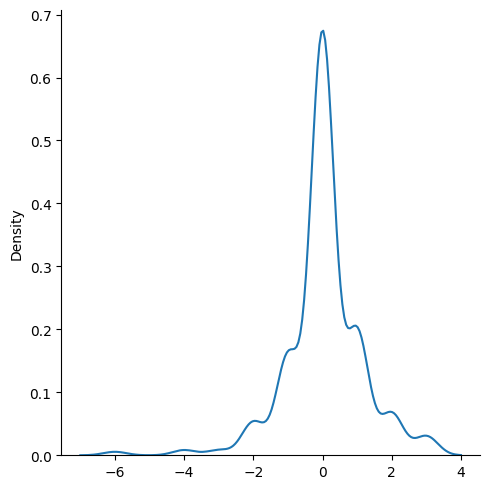

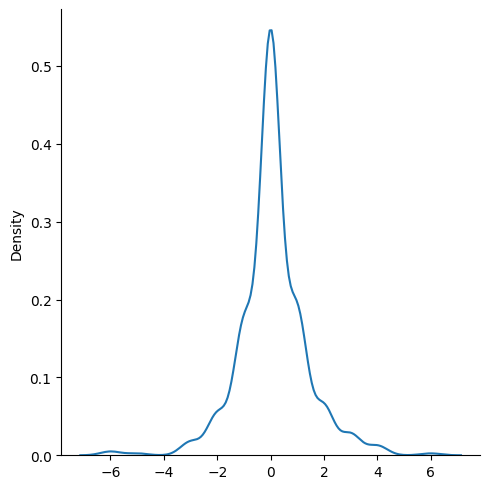

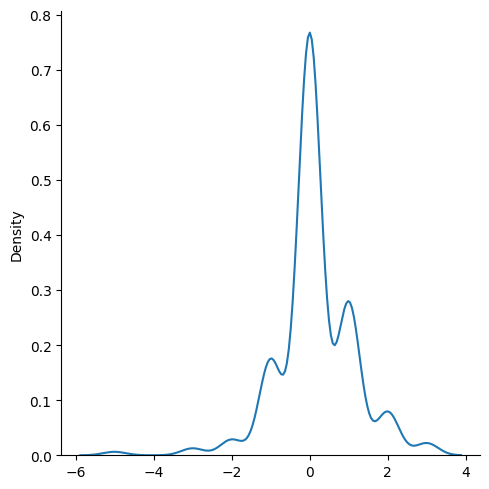

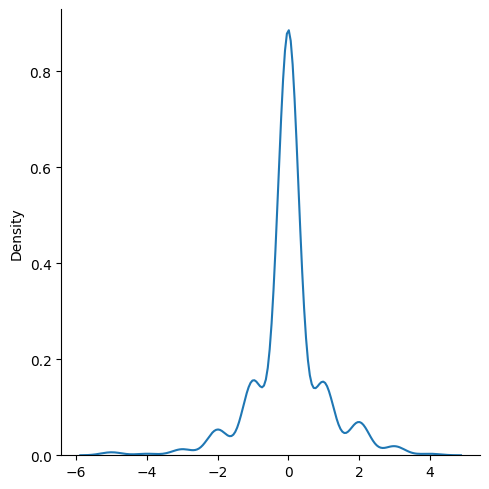

In [466]:
import seaborn as sns


# knn 
sns.displot(knn_error_matrix,  label="Nearest Neighbour", kind="kde")
sns.displot(rf_error_matrix,  label="Random Forest", kind="kde")
sns.displot(mlp_error_matrix, label="Multilayer Perceptron", kind="kde")
sns.displot(svr_error_matrix,label="Support Vector", kind="kde")


# sns.distplot(rf_error_matrix)
# plt.hist(knn_error_matrix, bins, alpha=1, label='knn', log=True)

# # rf
# plt.hist(rf_error_matrix, bins, alpha=1, label='rf', log=True)
# plt.legend(loc='upper right')
# plt.show()

# # mlp
# plt.hist(mlp_error_matrix, bins, alpha=1, label='mlp', log=True)
# plt.legend(loc='upper right')
# plt.show()

# # svr
# plt.hist(svr_error_matrix, bins, alpha=1, label='svr', log=True)
# plt.legend(loc='upper right')
# plt.show()

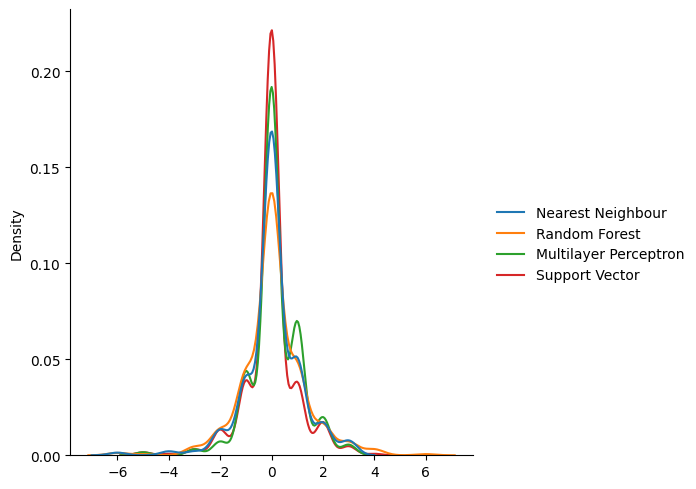

In [467]:
df = pd.DataFrame({
    "Nearest Neighbour": knn_error_matrix,
    "Random Forest": rf_error_matrix,
    "Multilayer Perceptron": mlp_error_matrix,
    "Support Vector": svr_error_matrix,
})

sns.displot(
#     [knn_error_matrix, rf_error_matrix,mlp_error_matrix, svr_error_matrix], 
    df,
    kind="kde",
)
# sns.displot(mlp_error_matrix, label="Multilayer Perceptron", kind="kde")
# sns.displot(svr_error_matrix,label="Support Vector", kind="kde")

In [478]:
def anova_test_model(x_data, y_data, model_pipeline, test_size=0.15, seed=42):
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, 
        y_data, 
        test_size=test_size,
        random_state=seed
    )
    
    model_pipeline.fit(x_train, y_train)
    
    pred = model_pipeline.predict(x_test)

    pred = np.array([int(round(i)) for i in  pred])
    
    ret = mean_absolute_error(y_test, pred)

    return ret, (y_test - pred)

In [479]:
from collections import defaultdict

seeds = [69, 420, 1337, 6969, 0xdeadbeef]

results = defaultdict(list)

models = {
    "mlp": lambda: make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(80, 30,), activation="relu", max_iter=1000)),
    "svm": lambda: make_pipeline(StandardScaler(), SVR(kernel="rbf", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)),
    "rf":  lambda: make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=4)),
    "knn": lambda: make_pipeline(StandardScaler(), KNeighborsRegressor(5))
}


for seed in seeds:    
    for model in models:
        print(f"Running Model {model} for seed {seed}")
        mae, _ = anova_test_model(x_data, epochs, models[model](), seed=seed)
        print(f"mae: {mae}")
        results[model].append(mae)
        
results



Running Model mlp for seed 69
mae: 0.5219399538106235
Running Model svm for seed 69
mae: 0.418013856812933
Running Model rf for seed 69
mae: 0.7090069284064665
Running Model knn for seed 69
mae: 0.5889145496535797
Running Model mlp for seed 420
mae: 0.5750577367205543
Running Model svm for seed 420
mae: 0.5034642032332564
Running Model rf for seed 420
mae: 0.7413394919168591
Running Model knn for seed 420
mae: 0.6466512702078522
Running Model mlp for seed 1337
mae: 0.5658198614318707
Running Model svm for seed 1337
mae: 0.5842956120092379
Running Model rf for seed 1337
mae: 0.7944572748267898
Running Model knn for seed 1337
mae: 0.6766743648960739
Running Model mlp for seed 6969
mae: 0.5773672055427251
Running Model svm for seed 6969
mae: 0.5011547344110855
Running Model rf for seed 6969
mae: 0.7759815242494227
Running Model knn for seed 6969
mae: 0.6605080831408776
Running Model mlp for seed 3735928559
mae: 0.5727482678983834
Running Model svm for seed 3735928559
mae: 0.51963048498845

defaultdict(list,
            {'mlp': [0.5219399538106235,
              0.5750577367205543,
              0.5658198614318707,
              0.5773672055427251,
              0.5727482678983834],
             'svm': [0.418013856812933,
              0.5034642032332564,
              0.5842956120092379,
              0.5011547344110855,
              0.5196304849884527],
             'rf': [0.7090069284064665,
              0.7413394919168591,
              0.7944572748267898,
              0.7759815242494227,
              0.7852193995381063],
             'knn': [0.5889145496535797,
              0.6466512702078522,
              0.6766743648960739,
              0.6605080831408776,
              0.6882217090069284]})

In [470]:
lorenzo_sorted_loglist, lorenzo_tasks

([('/Users/Chris/Downloads/0/cloud_experiment_fca162e2-af0d-4412-a9dd-b7b63deb4f3e/0/Nets.cifar10_cnn_Dataset.cifar10/events.out.tfevents.1666652458.trainjob-fca162e2-af0d-4412-a9dd-b7b63deb4f3e-master-0.1.0',
                        metric      value  step                     wall_time
   0   training loss per epoch   2.287352   1.0 2022-10-24 23:02:14.481901568
   0        accuracy per epoch  23.920000   1.0 2022-10-24 23:02:14.482018048
   0   training loss per epoch   2.208657   2.0 2022-10-24 23:03:31.793368832
   0        accuracy per epoch  30.920000   2.0 2022-10-24 23:03:31.793495296
   0   training loss per epoch   2.160073   3.0 2022-10-24 23:04:47.515908608
   ..                      ...        ...   ...                           ...
   0   training loss per epoch   1.778691  38.0 2022-10-24 23:49:39.025341440
   0        accuracy per epoch  66.040001  38.0 2022-10-24 23:49:39.025438976
   0   training loss per epoch   1.769084  39.0 2022-10-24 23:50:55.699096832
   0      

In [471]:
import pandas
import researchpy as rp
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from tensorboard.backend.event_processing import event_accumulator

In [629]:
EPOCHS = [40, 80]

def logs_to_dataset_anova(logs, tasks, data_pos=7):

    
    d = {
        "Model": [],
        "Epochs": [],
        "Learningrate": [],
        "Optimizer": [],
        "Accuracy": [],
        "Runtime": [],
    }

    for i, log in enumerate(logs):
        task = tasks[i]

        model = task['jobClassParameters'][0]['networkConfiguration']['network']

        dataset = task['jobClassParameters'][0]['networkConfiguration']['dataset']
        epochs = task['jobClassParameters'][0]['hyperParameters']['default']['totalEpochs']
        learning_rate = task['jobClassParameters'][0]['hyperParameters']['default']['optimizerConfig']['learningRate']
        optimizer = task['jobClassParameters'][0]['hyperParameters']['default']['optimizerConfig']['type']
        
        model = task['jobClassParameters'][0]['networkConfiguration']['network']
        model_path = log[0].split("/")[data_pos]
        
        dataset = model_path.split(".")[-1]
        model = model_path.split(".")[1]
        

        
        epochs = (len(log[1]) + 1) // 2
        if (abs(epochs - 80) < abs(epochs-40)):
            epochs = 80
        else: epochs = 40
        
        if 'accuracy' in log[1]['metric'].iloc[-1]:
            accuracy = log[1]['value'].iloc[-1] / 100
        elif 'accuracy' in log[1]['metric'].iloc[-2]:
            accuracy = log[1]['value'].iloc[-2] / 100
            
        else:
            print("Accuracy not found")
            raise Exception()
            
        model_id = MODELS.index(model)
        dataset_id = DATASETS.index(dataset)
        optimizer_id = OPTIMISERS.index(optimizer)
        lr_id = LRS.index(learning_rate)
        
        time_error_delta = timedelta(seconds=0.01) # probably not so quick epochs

        start_time = log[1]['wall_time'].iloc[0]
        end_time = log[1]['wall_time'].iloc[-1]
        
        runtime = end_time - start_time
        
#         data_row = [model, epochs, learning_rate, optimizer, runtime.total_seconds()]
    
        
            
        d["Model"].append(model)
        d["Epochs"].append(epochs)
        d["Learningrate"].append(learning_rate)
        d["Optimizer"].append(optimizer)
        d["Accuracy"].append(accuracy)
        if epochs == 40:
            d["Runtime"].append(runtime.total_seconds())
        else: 
            d["Runtime"].append(runtime.total_seconds())
            
    return d

lorenzo_anova_data = logs_to_dataset_anova(lorenzo_sorted_loglist, lorenzo_tasks, data_pos=7)
chris_anova_data = logs_to_dataset_anova(chris_sorted_loglist, chris_tasks, data_pos=11)

total_data = {
        "Model": [],
        "Epochs": [],
        "Learningrate": [],
        "Optimizer": [],
        "Accuracy": [],
        "Runtime": [],
    }

for i in total_data:
    total_data[i].extend(lorenzo_anova_data[i])
    total_data[i].extend(chris_anova_data[i])
    

df = pandas.DataFrame(total_data)

rp.summary_cont(df.groupby(['Model', "Epochs", "Optimizer", "Learningrate"]))['Runtime']

N       Mean  \
Model                     Epochs Optimizer Learningrate                 
cifar10_cnn_Dataset       40     Adam      0.0001        2  2984.9007   
                                           0.0010        3  2970.2960   
                                 SGD       0.0001        2  2958.9574   
                                           0.0010        5  3015.9278   
                          80     Adam      0.0001        6  6121.9048   
                                           0.0010        1  6056.5250   
                                 SGD       0.0001        4  6106.3842   
                                           0.0010        3  6018.6081   
fashion_mnist_cnn_Dataset 40     Adam      0.0001        3   527.0480   
                                           0.0010        3   545.1817   
                                 SGD       0.0001        2   531.8078   
                                           0.0010        2   512.0178   
                          80     Adam      0.0001        1  1075.4559   
                                           0.0010        5  1065.2083   
                                 SGD       0.0001        4  1050.6095   
                                           0.0010        2  1058.8556   

                                                               SD        SE  \
Model                     Epochs Optimizer Learningrate                       
cifar10_cnn_Dataset       40     Adam      0.0001         13.0081    9.1981   
                                           0.0010          7.7484    4.4736   
                                 SGD       0.0001          5.9994    4.2422   
                                           0.0010         42.0456   18.8034   
                          80     Adam      0.0001         87.0922   35.5552   
                                           0.0010             NaN       NaN   
                                 SGD       0.0001         32.3051   16.1526   
                                           0.0010        235.0654  135.7151   
fashion_mnist_cnn_Dataset 40     Adam      0.0001         12.6036    7.2767   
                                           0.0010         60.3038   34.8164   
                                 SGD       0.0001         20.7718   14.6879   
                                           0.0010          6.3794    4.5109   
                          80     Adam      0.0001             NaN       NaN   
                                           0.0010         31.6957   14.1748   
                                 SGD       0.0001         23.2329   11.6164   
                                           0.0010         32.0223   22.6432   

                                                         95% Conf.   Interval  
Model                     Epochs Optimizer Learningrate                        
cifar10_cnn_Dataset       40     Adam      0.0001        2868.0271  3101.7742  
                                           0.0010        2951.0478  2989.5442  
                                 SGD       0.0001        2905.0548  3012.8600  
                                           0.0010        2963.7213  3068.1343  
                          80     Adam      0.0001        6030.5071  6213.3024  
                                           0.0010              NaN        NaN  
                                 SGD       0.0001        6054.9796  6157.7889  
                                           0.0010        5434.6733  6602.5429  
fashion_mnist_cnn_Dataset 40     Adam      0.0001         495.7389   558.3572  
                                           0.0010         395.3787   694.9848  
                                 SGD       0.0001         345.1806   718.4350  
                                           0.0010         454.7016   569.3340  
                          80     Adam      0.0001              NaN        NaN  
                                           0.0010        1025.8528  1104.5637  
                                 SGD   

In [633]:
m = ols('Runtime ~ C(Model) * C(Epochs) * C(Learningrate) * C(Optimizer)', df).fit()

print(f"Overall model F({m.df_model: .0f},{m.df_resid: .0f}) = {m.fvalue: .3f}, p = {m.f_pvalue: .4f}")

Overall model F( 15, 32) =  2940.693, p =  0.0000


In [634]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Runtime   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2941.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           7.93e-46
Time:                        04:20:01   Log-Likelihood:                -264.76
No. Observations:                  48   AIC:                             561.5
Df Residuals:                      32   BIC:                             591.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                           2984.9007     52.095     57.297      0.000    2878.786    3091.015
C(Model)[T.fashion_mnist_cnn_Dataset]                                                              -2457.8526     67.255    -36.545      0.000   -2594.846   -2320.859
C(Epochs)[T.80]                                                                                     3137.0041     60.154     52.149      0.000    3014.474    3259.535
C(Learningrate)[T.0.001]                                                                             -14.6047     67.255     -0.217      0.829    -151.598     122.389
C(Optimizer)[T.SGD]                                                                                  -25.9433     73.674     -0.352      0.727    -176.012     124.125
C(Model)[T.fashion_mnist_cnn_Dataset]:C(Epochs)[T.80]                                              -2588.5962    104.190    -24.845      0.000   -2800.825   -2376.367
C(Model)[T.fashion_mnist_cnn_Dataset]:C(Learningrate)[T.0.001]                                        32.7384     90.232      0.363      0.719    -151.057     216.534
C(Epochs)[T.80]:C(Learningrate)[T.0.001]                                                             -50.7751    104.190     -0.487      0.629    -263.004     161.454
C(Model)[T.fashion_mnist_cnn_Dataset]:C(Optimizer)[T.SGD]                                             30.7031     99.755      0.308      0.760    -172.491     233.897
C(Epochs)[T.80]:C(Optimizer)[T.SGD]                                                                   10.4227     87.689      0.119      0.906    -168.195     189.040
C(Learningrate)[T.0.001]:C(Optimizer)[T.SGD]                                                          71.5751     91.229      0.785      0.438    -114.252     257.402
C(Model)[T.fashion_mnist_cnn_Dataset]:C(Epochs)[T.80]:C(Learningrate)[T.0.001]                        22.3937    144.871      0.155      0.878    -272.699     317.486
C(Model)[T.fashion_mnist_cnn_Dataset]:C(Epochs)[T.80]:C(Optimizer)[T.SGD]                            -40.0290    137.831     -0.290      0.773    -320.782     240.724
C(Model)[T.fashion_mnist_cnn_Dataset]:C(Learningrate)[T.0.001]:C(Optimizer)[T.SGD]                  -109.4989    131.792     -0.831      0.412    -377.950     158.952
C(Epochs)[T.80]:C(Learningrate)[T.0.001]:C(Optimizer)[T.SGD]                                         -93.9715    133.497     -0.704      0.487    -365.895     177.952
C(Model)[T.fashion_mnist_cnn_Dataset]:C(Epochs)[T.80]:C(Learningrate)[T.0.001

In [516]:
res = sm.stats.anova_lm(m, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(Model),1.376718e+08,1.0,25364.084542,5.654078e-48
C(Epochs),3.639813e+07,1.0,6705.841578,9.397502e-39
C(Learningrate),1.787062e+03,1.0,0.329241,5.701177e-01
C(Optimizer),4.482917e+02,1.0,0.082591,7.756687e-01
C(Model):C(Epochs),1.540748e+07,1.0,2838.611547,7.999666e-33
C(Model):C(Learningrate),2.134652e+03,1.0,0.393280,5.350298e-01
C(Epochs):C(Learningrate),7.906580e+03,1.0,1.456676,2.363062e-01
C(Model):C(Optimizer),4.051527e+02,1.0,0.074644,7.864474e-01
C(Epochs):C(Optimizer),4.906174e+02,1.0,0.090389,7.656275e-01
C(Learningrate):C(Optimizer),1.818265e+02,1.0,0.033499,8.559314e-01


In [538]:
import os
from glob import glob


search_dir = "/Users/Chris/Documents/tudelft/fltk-testbed/jupyter/logging_final_boss_baseline_final/"
all_logs = [y for x in os.walk(search_dir) for y in glob(os.path.join(x[0], '*.0'))]

baseline_files = list(filter(lambda f:  "final_boss_good_model_new_good_deadline_baseline" in f, all_logs))


search_dir = "/Users/Chris/Documents/tudelft/fltk-testbed/jupyter/logging_final_final/"
all_logs = [y for x in os.walk(search_dir) for y in glob(os.path.join(x[0], '*.0'))]

model_files = list(filter(lambda f:  "final_boss_good_model_new_good_deadline" in f, all_logs))


len(baseline_files), len(model_files)


(9, 10)

In [561]:
from datetime import datetime
epoch_time = datetime(1970, 1, 1)

In [646]:
def calc_stats(files, start_times):
    runs = [[], [], []]
    times = [
        {"minTime": datetime(3033, 1, 1), "maxTime": datetime(1970, 1, 1)}, 
        {"minTime": datetime(3033, 1, 1), "maxTime": datetime(1970, 1, 1)}, 
        {"minTime": datetime(3033, 1, 1), "maxTime": datetime(1970, 1, 1)}
    ]
    
    for i in files:
        run = int(i.split("/")[8])

        logs = logs_to_pandas(i)

        start_seconds = (logs['wall_time'].iloc[0] - epoch_time).total_seconds()
        end_seconds = (logs['wall_time'].iloc[-1] - epoch_time).total_seconds()

        if logs['wall_time'].iloc[0] < times[run]["minTime"]:
            times[run]["minTime"] = logs['wall_time'].iloc[0]

        if logs['wall_time'].iloc[-1] > times[run]["maxTime"]:
            times[run]["maxTime"] = logs['wall_time'].iloc[-1]

        if "accuracy" in logs['metric'].iloc[-1]:
            accuracy = logs['value'].iloc[-1]
        else: 
            accuracy = logs['value'].iloc[-2]

        runs[run].append(accuracy)

    deltas = [0, 0, 0]
    logs = logs_to_pandas(files[0])
    
    for i, val in enumerate(times):
        delta = val['maxTime'] - start_times[i]
        deltas[i] = len(runs[i]) / (delta.total_seconds() / 3600)
        
    return runs, deltas
    
    

In [647]:
start_times_baseline = [datetime(2022,11,1, 20, 37, 30), datetime(2022,11,1, 21, 18, 3), datetime(2022, 11, 1, 22, 1, 15)]

runs_baseline, throughput_baseline = calc_stats(baseline_files, start_times_baseline)

runs_baseline, throughput_baseline

([[87.12000274658203, 87.68000030517578, 88.5999984741211, 86.44000244140625],
  [88.63999938964844, 33.91999816894531, 87.55999755859375],
  [33.15999984741211, 54.15999984741211]],
 [5.941585441370163, 4.179503608885656, 1.5599864440817979])

In [648]:
start_times_model = [
    datetime(2022,11, 1, 16, 50, 23), 
    datetime(2022,11, 1, 17, 36, 51), 
    datetime(2022,11, 1, 18, 10, 19)
]


runs_model, throughput_model = calc_stats(model_files, start_times_model)

runs_model, throughput_model

([[86.4800033569336,
   82.44000244140625,
   82.19999694824219,
   52.959999084472656,
   86.95999908447266],
  [82.55999755859375, 55.720001220703125, 86.36000061035156],
  [43.79999923706055, 40.119998931884766]],
 [6.491802229145023, 5.450019777390056, 10.77581205730186])

In [649]:
import numpy as np
from scipy import stats
N = 3

a = np.array(throughput_baseline)
b = np.array(throughput_model)

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s



## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))


## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = -1.77907996594168
p = 1.8501551340019335
t = -1.77907996594168
p = 0.14984486599806657


In [650]:
N = 3

a = np.array([0, 33.9, 43.7])
b = np.array([53.0, 55.8, 42])

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s



## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))


## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = -1.7562948217600656
p = 1.8461190763479023
t = -1.7562948217600658
p = 0.15388092365209763


In [651]:
N = 3

a = np.array([87.5               , 88.1, 0])
b = np.array([85.7               ,84.5, 0])

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s



## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))


## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 0.04416123508380127
p = 0.966892523659435
t = 0.04416123508380127
p = 0.966892523659435


In [655]:


data = []
for i, val in enumerate(throughput_baseline):
    row = ["BASE", chr(ord("A") + i), val]
    data.append(row)
 
for i, val in enumerate(throughput_model):
    row = ["MODEL", chr(ord("A") + i), val]
    data.append(row)
    
    
df = pandas.DataFrame(data, columns=["Run", "Repitition", "Throughput"])
df

,Run,Repitition,Throughput
0,BASE,A,5.941585
1,BASE,B,4.179504
2,BASE,C,1.559986
3,MODEL,A,6.491802
4,MODEL,B,5.450020
5,MODEL,C,10.775812


In [661]:
model = ols('Throughput ~ C(Run)', df).fit()
res = sm.stats.anova_lm(model, typ=2)
res

,sum_sq,df,F,PR(>F)
C(Run),20.300938,1.0,3.165126,0.149845
Residual,25.655776,4.0,NaN,NaN


In [662]:
model.summary()

/Users/Chris/Documents/tudelft/fltk-testbed/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Throughput   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     3.165
Date:                Wed, 02 Nov 2022   Prob (F-statistic):              0.150
Time:                        04:36:38   Log-Likelihood:                -12.873
No. Observations:                   6   AIC:                             29.75
Df Residuals:                       4   BIC:                             29.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.8937      1.462      2.663      0.056      -0.166       7.953
C(Run)[T.MODEL]     3.6789      2.068      1.779      0.150      -2.062       9.420
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.598
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.613
Skew:                           0.338   Prob(JB):                        0.736
Kurtosis:                       1.588   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""